In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
import cv2 as cv
import openpyxl
import numpy as np
from PIL import Image, ImageTk
from tkinter import filedialog as fd
import os
from sklearn.model_selection import train_test_split

In [3]:
base_folder = "./Dataset/"

# Khởi tạo danh sách để lưu trữ hình ảnh và nhãn (labels)
images = []
labels = []

# Khởi tạo một từ điển để ánh xạ từ tên nhãn (string) sang số nguyên
label_to_int = {}
int_to_label = {}
current_label = 0

# Duyệt qua tất cả các thư mục con trong thư mục chính
for person_folder in os.listdir(base_folder):
    person_path = os.path.join(base_folder, person_folder)
    
    # Kiểm tra nếu person_path là một thư mục
    if os.path.isdir(person_path):
        # Lặp qua tất cả các tệp trong thư mục của người đó
        for filename in os.listdir(person_path):
            # Kiểm tra nếu tệp có định dạng hình ảnh (vd: jpg, jpeg, png)
            if filename.endswith((".jpg", ".jpeg", ".png")):
                # Tạo đường dẫn đầy đủ đến tệp
                image_path = os.path.join(person_path, filename)
                
                # Đọc hình ảnh bằng OpenCV
                image = cv.imread(image_path)
                
                if image is not None:
                    # Chuyển hình ảnh thành ma trận và thêm vào danh sách images
                    # Thay đổi kích thước hình ảnh (vd: 128x128)
                    image = cv.resize(image, (128, 128))
                    images.append(image)
                    
                    # Kiểm tra xem nhãn này đã được thêm vào từ điển chưa
                    if person_folder not in label_to_int:
                        label_to_int[person_folder] = current_label
                        int_to_label[current_label] = person_folder
                        current_label += 1
                    
                    # Chuyển đổi tên nhãn từ chuỗi sang số nguyên và thêm vào danh sách labels
                    label = label_to_int[person_folder]
                    labels.append(label)

# Chuyển danh sách images và labels thành các mảng NumPy
images_array = np.array(images)
labels_array = np.array(labels)

# Chuẩn hóa giá trị pixel để nằm trong khoảng [0, 1]
images_array = images_array / 255.0

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70% - 30%)
# train_images, test_images, train_labels, test_labels = train_test_split(images_array, labels_array, test_size=0.3, random_state=42)
train_images = images_array
train_labels = labels_array


In [4]:
dataTest_folder = "./DataTest/"


# Khởi tạo danh sách để lưu trữ hình ảnh và nhãn (labels) của dataTest
dataTest_images = []
dataTest_labels = []

# Tạo một từ điển mới để ánh xạ từ nhãn mới sang số nguyên
label_to_int_dataTest = {}
int_to_label_dataTest = {}
current_label_dataTest = 0

# Duyệt qua tất cả các thư mục con trong thư mục dataTest
for person_folder in os.listdir(dataTest_folder):
    person_path = os.path.join(dataTest_folder, person_folder)
    
    # Kiểm tra nếu person_path là một thư mục
    if os.path.isdir(person_path):
        # Lặp qua tất cả các tệp trong thư mục của người đó
        for filename in os.listdir(person_path):
            # Kiểm tra nếu tệp có định dạng hình ảnh (vd: jpg, jpeg, png)
            if filename.endswith((".jpg", ".jpeg", ".png")):
                # Tạo đường dẫn đầy đủ đến tệp
                image_path = os.path.join(person_path, filename)
                
                # Đọc hình ảnh bằng OpenCV
                image = cv.imread(image_path)
                
                if image is not None:
                    # Chuyển hình ảnh thành ma trận và thêm vào danh sách dataTest_images
                    # Thay đổi kích thước hình ảnh nếu cần
                    image = cv.resize(image, (128, 128))
                    dataTest_images.append(image)
                    
                    # Kiểm tra xem nhãn này đã được thêm vào từ điển chưa
                    if person_folder not in label_to_int_dataTest:
                        label_to_int_dataTest[person_folder] = current_label_dataTest
                        int_to_label_dataTest[current_label_dataTest] = person_folder
                        current_label_dataTest += 1
                    
                    # Chuyển đổi tên nhãn từ chuỗi sang số nguyên và thêm vào danh sách dataTest_labels
                    label = label_to_int_dataTest[person_folder]
                    dataTest_labels.append(label)

# Chuyển danh sách dataTest_images và dataTest_labels thành các mảng NumPy
test_images = np.array(dataTest_images)
test_labels = np.array(dataTest_labels)

# Chuẩn hóa giá trị pixel để nằm trong khoảng [0, 1]
test_images = test_images / 255.0

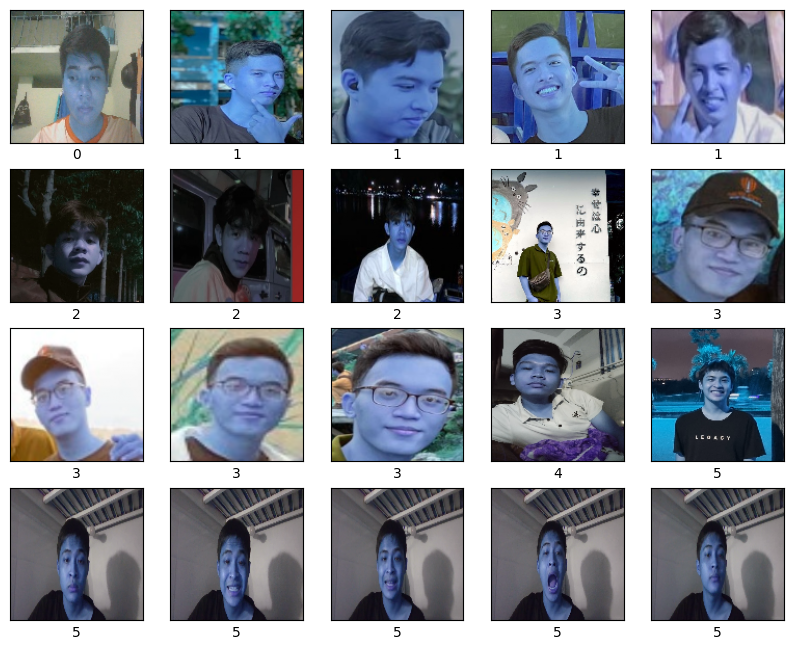

In [5]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

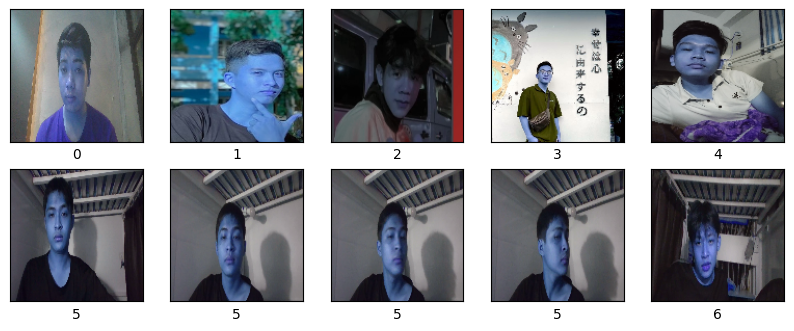

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(test_labels[i])
plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Thêm Dropout để giảm overfitting
model.add(layers.Dropout(0.5))

In [8]:

model.add(layers.Dense(current_label, activation='softmax'))  # Số lượng lớp đầu ra bằng số nhãn, sử dụng softmax

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sử dụng sparse categorical cross-entropy cho việc phân loại
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,  # Tăng số epoch để huấn luyện lâu hơn
                    validation_data=(test_images, test_labels))

Epoch 1/100
2/2 [==============================] - 3s 580ms/step - loss: 1.9591 - accuracy: 0.3429 - val_loss: 5.0134 - val_accuracy: 0.3636
Epoch 2/100
2/2 [==============================] - 1s 182ms/step - loss: 3.8557 - accuracy: 0.4571 - val_loss: 2.4360 - val_accuracy: 0.0909
Epoch 3/100
2/2 [==============================] - 1s 215ms/step - loss: 2.2129 - accuracy: 0.2857 - val_loss: 1.9367 - val_accuracy: 0.0909
Epoch 4/100
2/2 [==============================] - 1s 229ms/step - loss: 1.8305 - accuracy: 0.2857 - val_loss: 1.8216 - val_accuracy: 0.5455
Epoch 5/100
2/2 [==============================] - 1s 222ms/step - loss: 1.7502 - accuracy: 0.5714 - val_loss: 1.7807 - val_accuracy: 0.3636
Epoch 6/100
2/2 [==============================] - 1s 181ms/step - loss: 1.8210 - accuracy: 0.4571 - val_loss: 1.5893 - val_accuracy: 0.3636
Epoch 7/100
2/2 [==============================] - 1s 226ms/step - loss: 1.4704 - accuracy: 0.4286 - val_loss: 1.4667 - val_accuracy: 0.4545
Epoch 8/100
2

In [9]:
model.save("my_model.h5")

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from tensorflow.keras.models import load_model

# Tải mô hình từ tệp đã lưu
loaded_model = load_model("my_model.h5")

# Sử dụng mô hình tải lên để dự đoán
predictions = loaded_model.predict(test_images)

# Đánh giá hiệu suất của mô hình
test_loss, test_accuracy = loaded_model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

1/1 [==============================] - 0s 190ms/step - loss: 0.2590 - accuracy: 0.9091
Test accuracy: 0.9090909361839294


1/1 [==============================] - 0s 49ms/step


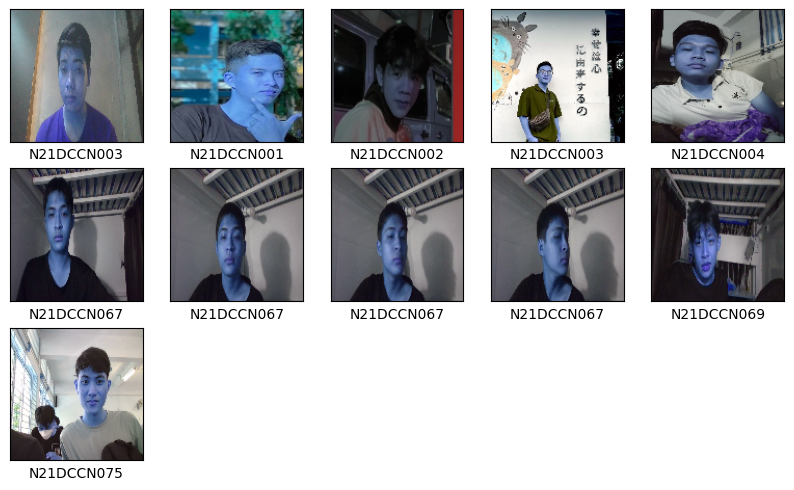

In [13]:

# Lấy dự đoán từ mô hình
predictions = loaded_model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(11):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Hiển thị hình ảnh
    plt.imshow(test_images[i])
    
    # Lấy nhãn dự đoán (chỉ mục lớp có xác suất cao nhất)
    predicted_label_index = np.argmax(predictions[i])
    
    # Lấy tên nhãn dự đoán từ từ điển ánh xạ ngược
    predicted_label = int_to_label_dataTest[predicted_label_index]
    
    # Hiển thị tên dự đoán
    plt.xlabel(predicted_label)
    
plt.show()